# Sorting Algorithms

Algorithms that reorganise data so that they are in either ascending or descending order. Widely used in database related algorithms

___________________________________________________________________________________________________________________

## Heap Sort

Works by visualizing the elements of an array as a heap (min or max), and placing that largest/smallest element at the beginning of the list. In a heap tree , the max/min element is at the root.


Time complexity - O(n log(n))

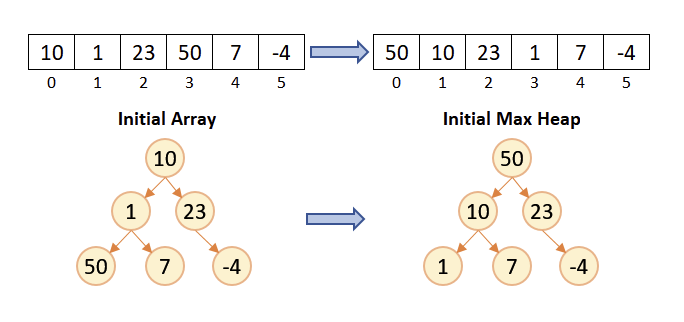

In [1]:
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
    
    if l < n and arr[largest] < arr[l]:
        largest = l
    if r < n and arr[largest] < arr[r]:
        largest = r
    
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)
    x = n // 2
    for i in range(x - 1, -1, -1):
        heapify(arr, n, i)
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

In [2]:
import numpy as np
import string
nums = list(set(np.random.randint(0, 50, 26)))
np.random.shuffle(nums)
print('Unsorted array :', nums)
heap_sort(nums)
print('Sorted array :', nums)

Unsorted array : [9, 23, 31, 4, 41, 29, 33, 7, 28, 42, 25, 38, 36, 17, 24, 43, 32, 15, 13, 1, 40, 18]
Sorted array : [1, 4, 7, 9, 13, 15, 17, 18, 23, 24, 25, 28, 29, 31, 32, 33, 36, 38, 40, 41, 42, 43]


___________________________________________________________________________________________________________________

## Radix Sort

Non comparative sorting algorithm , that sorts elements by processing individual digits at different positions. It repeatedly uses the counting sort algorithm to sort elements based on each digits value, from least significant digit to most significant digit.

Time complexity - O(nk)

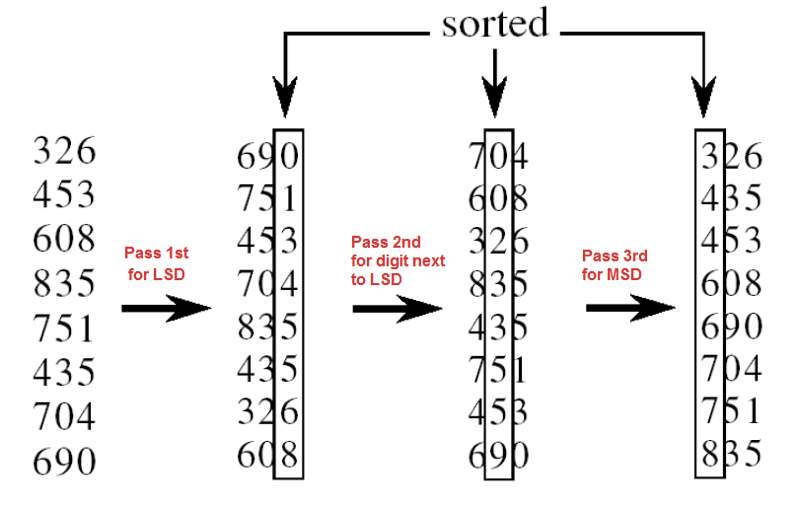

In [3]:
def counting(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 100

    for i in range(0, n):
        index = arr[i] // exp
        count[index % 10] += 1

    for i in range(1, 100):
        count[i] += count[i - 1]

    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    for i in range(0, n):
        arr[i] = output[i]

def radix_sort(arr):
    max_element = max(arr)
    exp = 1
    while max_element // exp > 0:
        counting(arr, exp)
        exp *= 10

In [4]:
nums = list(set(np.random.randint(0,75, 30)))
np.random.shuffle(nums)
print('Unsorted array :', nums)
radix_sort(nums)
print('Sorted array :', nums)

Unsorted array : [49, 6, 16, 32, 74, 53, 0, 8, 13, 66, 30, 25, 39, 33, 59, 71, 50, 36, 21, 58, 44, 65, 73, 34, 46, 29]
Sorted array : [0, 6, 8, 13, 16, 21, 25, 29, 30, 32, 33, 34, 36, 39, 44, 46, 49, 50, 53, 58, 59, 65, 66, 71, 73, 74]


___________________________________________________________________________________________________________________

## Counting Sort

Sorts by determining the number of occurences of each unique element in the input array. Works well with small integers

Time complexity - O(n+k)

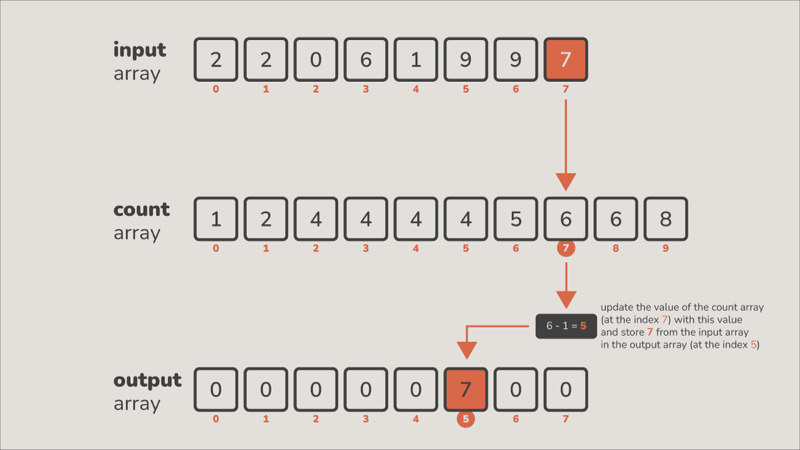

In [5]:
def counting_sort(arr):
    n = len(arr)
    output = [0] * n
    count = [0] * 100

    for i in range(0, n):
        count[arr[i]] += 1

    for i in range(1, 100):
        count[i] += count[i - 1]

    i = n - 1
    while i >= 0:
        output[count[arr[i]] - 1] = arr[i]
        count[arr[i]] -= 1
        i -= 1

    for i in range(0, n):
        arr[i] = output[i]

In [6]:
num_1 = list(set(np.random.randint(0,75, 30)))
np.random.shuffle(num_1)
print('Unsorted array :', num_1)
counting_sort(num_1)
print('Sorted array :', num_1)

Unsorted array : [73, 33, 4, 51, 27, 37, 2, 48, 31, 64, 8, 32, 65, 25, 3, 57, 17, 23, 67, 46, 55, 59, 19, 66, 9]
Sorted array : [2, 3, 4, 8, 9, 17, 19, 23, 25, 27, 31, 32, 33, 37, 46, 48, 51, 55, 57, 59, 64, 65, 66, 67, 73]


___________________________________________________________________________________________________________________

## Quick Sort

Based on the divide and conquer technique. An array is divided into sub arrays by selecting a pivot element. Pivot element is positioned in such a way that elements < pivot are kept on the left and elements > pivor are kept on the right

Time complexity - O(n log(n)) but worse case can be O(n2)

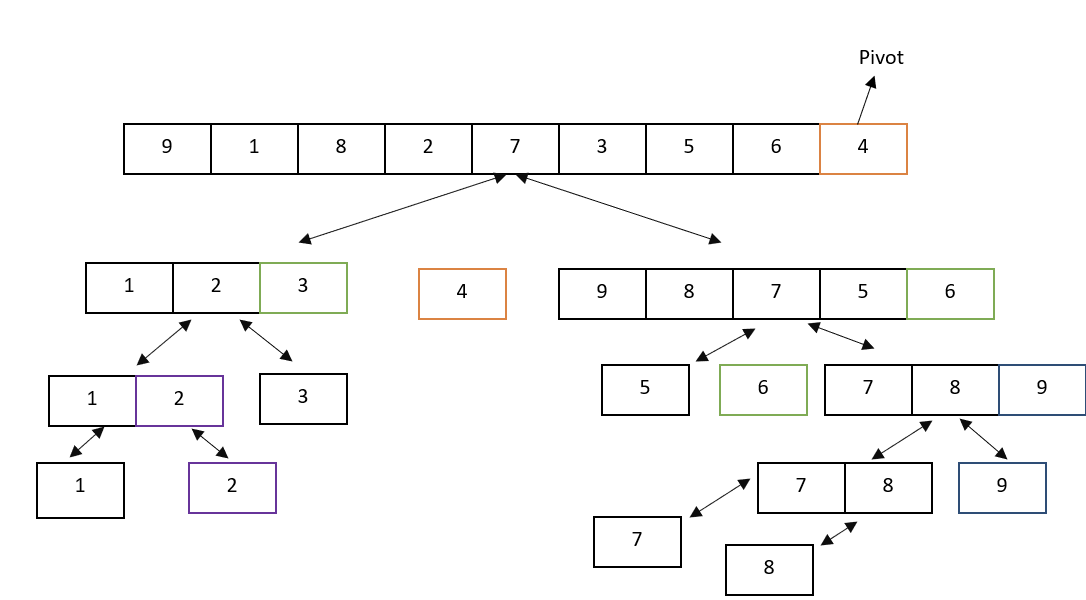

In [7]:
import numpy as np

def quick_sort(arr):
    n = len(arr)
    if n <= 1:
        return arr
    pivot = np.random.choice(arr)
    left = [x for x in arr if x < pivot]
    mid = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + mid + quick_sort(right)

In [8]:
num_2 = list(set(np.random.randint(0,35,30)))
np.random.shuffle(num_2)
print('Unsorted array :', num_2)
s = quick_sort(num_2)
print('Sorted array :', s)

Unsorted array : [14, 23, 7, 34, 3, 25, 4, 33, 21, 30, 19, 22, 20, 32, 10, 18, 16, 12, 11, 17]
Sorted array : [3, 4, 7, 10, 11, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 25, 30, 32, 33, 34]


___________________________________________________________________________________________________________________

## Merge Sort

Based on the divide and conquer principle. The array is divided all the way until one element is remaining . Then sub-arrays are created with sorted elements , and in the final step , all the sub-array are merged together to sort the input array.

Time complexity - O(n log(n))

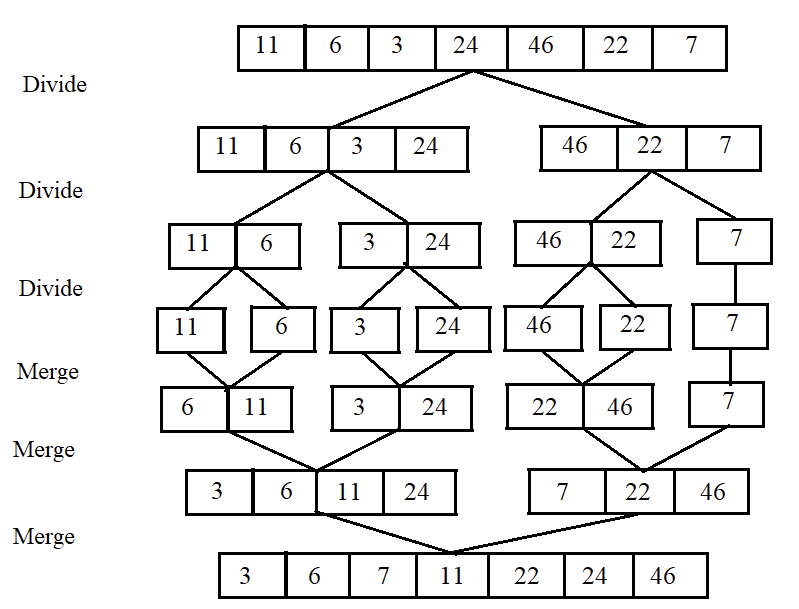

In [9]:
def merge_sort(arr):
    n = len(arr)

    if n > 1:
        mid = n // 2
        left = arr[:mid]
        right = arr[mid:]

        merge_sort(left)
        merge_sort(right)

        i = j = k = 0

        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1


In [10]:
alpha = [x for x in string.ascii_lowercase]
np.random.shuffle(alpha)
print('Unsorted array :', alpha)
merge_sort(alpha)
print('Sorted array :', alpha)

Unsorted array : ['q', 'e', 'm', 't', 'y', 'z', 'n', 'r', 'k', 'h', 'p', 'w', 'v', 'f', 's', 'g', 'x', 'j', 'o', 'i', 'l', 'b', 'c', 'u', 'a', 'd']
Sorted array : ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


___________________________________________________________________________________________________________________

## Selection Sort

The smallest item in the list is picked and placed at the beginning of the list. With each iteration elements are compared with the smallest element and sorted accordingly until the whole list is sorted

Time complexity - O(n2)

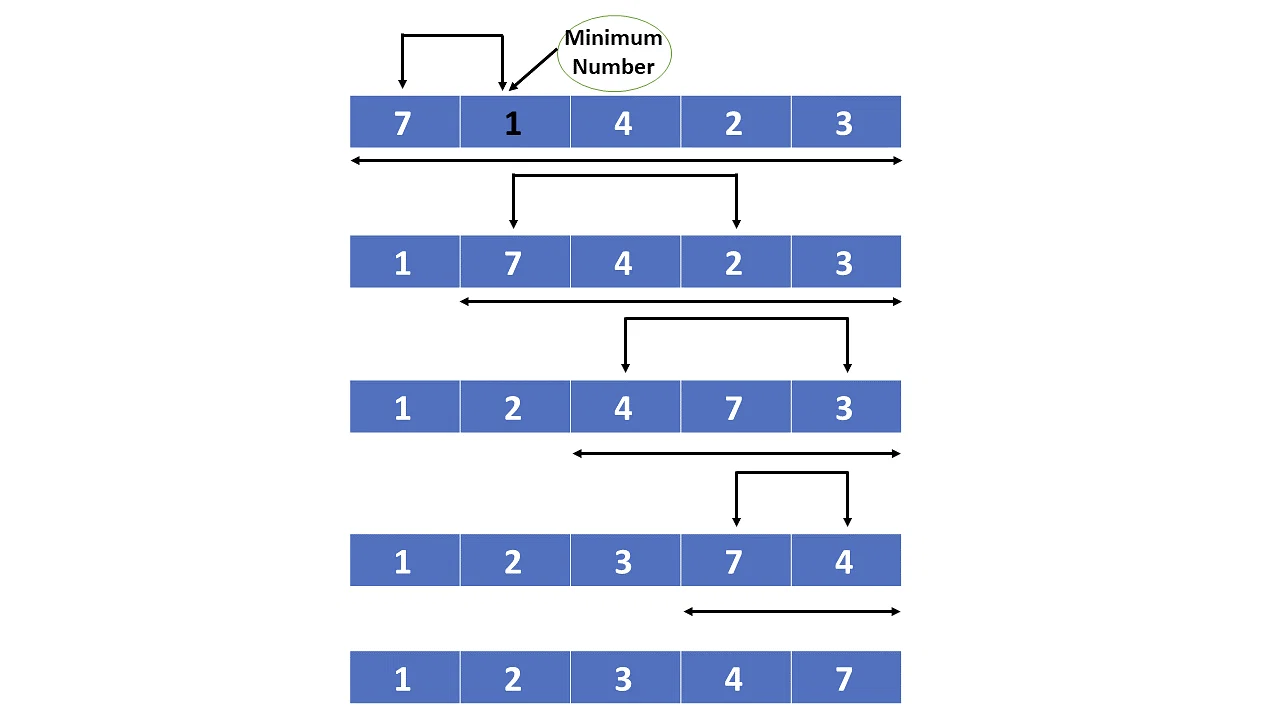

In [13]:
def selection_sort(arr):
    n = len(arr)
    for i in range(0, n - 1):
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]


In [14]:
nombre = np.random.randn(10)
print('Unsorted :', nombre)
selection_sort(nombre)
print('Sorted :', nombre)

Unsorted : [-1.17916558  0.21534093  0.087584   -0.79001877  0.88153653  0.20309352
 -0.46304249 -0.26934755  0.50653478  1.24235663]
Sorted : [-1.17916558 -0.79001877 -0.46304249 -0.26934755  0.087584    0.20309352
  0.21534093  0.50653478  0.88153653  1.24235663]


___________________________________________________________________________________________________________________

## Insertion Sort

Sorting method that divides an array into a sorted and unsorted part. Values are taken from the unsorted part, and placed at the right position in the sorted part.

Time complexity - O(n<sup>2</sup>)

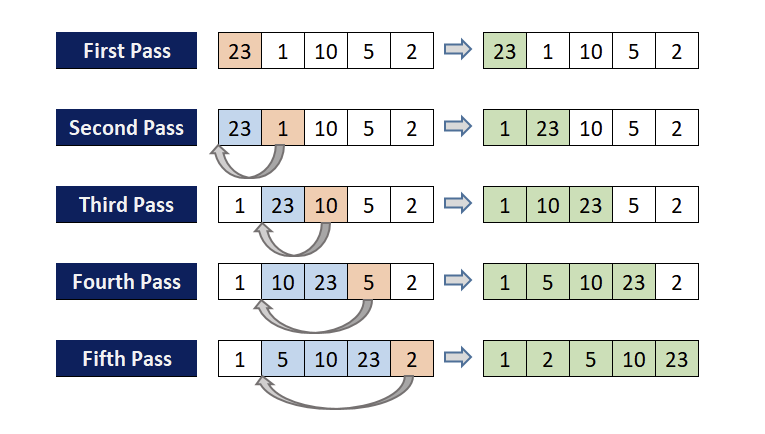

In [15]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key


In [16]:
um = list(range(0, 21))
np.random.shuffle(um)
print('Unsorted array :', um)
insertion_sort(um)
print('Sorted array :', um)

Unsorted array : [8, 20, 18, 19, 10, 5, 17, 3, 4, 9, 1, 11, 7, 0, 15, 14, 16, 6, 12, 2, 13]
Sorted array : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


___________________________________________________________________________________________________________________

## Bubble Sort

Compares adjacent elements in the list and places them in the right order until the entire list is sorted

Time complexity - O(n<sup>2</sup>)

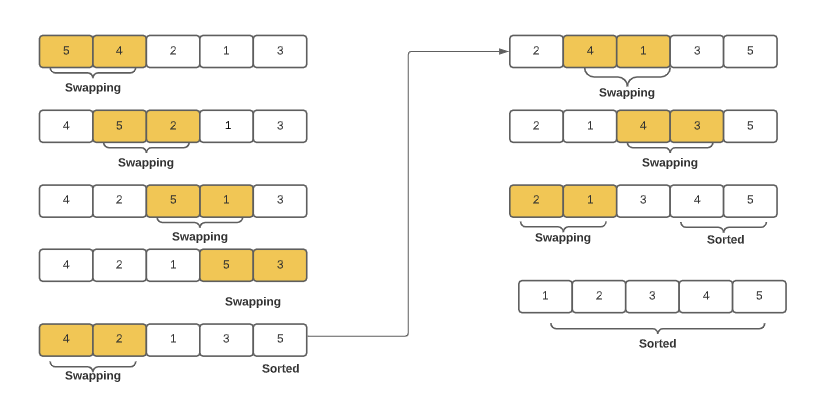

In [17]:
def bubble_sort(arr):
    n = len(arr) - 1
    for i in range(n, 0, -1):
        for j in range(i):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

In [18]:
mu = list(range(36, 89, 3))
np.random.shuffle(mu)
print('Unsorted array :', mu)
bubble_sort(mu)
print('Sorted array :', mu)

Unsorted array : [45, 39, 87, 84, 48, 60, 75, 42, 69, 81, 36, 78, 54, 57, 63, 66, 72, 51]
Sorted array : [36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87]


___________________________________________________________________________________________________________________

## Examples of how different sorting algorithms are used in everyday situations:

1. E-commerce Websites:
- Application: Sorting products based on various criteria like price, popularity,
  or customer reviews.
- Algorithm: Merge Sort can be used to efficiently sort and display a list of
  products in a user-friendly manner, ensuring a smooth shopping experience.

2. Contact Lists on Smartphones:
- Application: Sorting contacts alphabetically by name or organizing them by
  recent activity.
- Algorithm: Quick Sort or Merge Sort can be used to quickly rearrange the
  contact list based on different sorting criteria.

3. Library Catalogs:
- Application: Sorting books by title, author, publication date, or genre in a
  library's digital catalog.
- Algorithm: Merge Sort is a good choice for maintaining an organized and
  searchable catalog of books.

4. Flight Booking Systems:
-  Application: Sorting available flights based on departure time, price, or
   duration for easy comparison.
-  Algorithm: Heap Sort can efficiently sort flight options by various attributes,
   helping users find suitable flights quickly.

5. Search Engines:
-  Application: Displaying search results in order of relevance, taking into
   account factors like keywords and popularity.
-  Algorithm: Algorithms like Quick Sort or Merge Sort can be used to rank
   search results based on various relevance factors.

6. Online Music Streaming Platforms:
- Application: Creating playlists or sorting recommended songs based on user
  preferences, artist, or genre.
- Algorithm: Quick Sort or Merge Sort can be employed to organize playlists
  and recommended songs for users.

7. Scientific Data Analysis:
- Application: Sorting experimental data, such as measurements or
  observations, for analysis and visualization.
- Algorithm: Merge Sort can help organize and preprocess scientific data
  before performing complex analyses.

8. Data Databases and Management Systems:
- Application: Sorting database records based on different attributes for
  efficient data retrieval.
- Algorithm: Quick Sort, Merge Sort, or Radix Sort can be used to maintain a
  well-organized database for faster queries.

9. Social Media Feeds:
-  Application: Sorting posts in a user's feed by time, relevance, or
   engagement.
-  Algorithm: Merge Sort can be used to order posts based on timestamp,
   ensuring that users see the most recent content first.

10. Billing and Invoicing Systems:
- Application: Sorting invoices by date, amount, or client for accurate financial
  record keeping.
- Algorithm: Insertion Sort or Quick Sort can help organize invoices for easy
  tracking and reporting.

These real-life examples highlight how sorting algorithms play a crucial role in enhancing user experiences, optimizing data processing, and facilitating efficient information retrieval across a wide range of applications. The choice of sorting algorithm depends on the specific requirements of the application, the size of the
dataset, and the desired performance characteristics. By selecting the appropriate sorting algorithm, developers can ensure that data is presented in an organized and meaningful manner, ultimately contributing to smoother interactions and improved functionality for users.